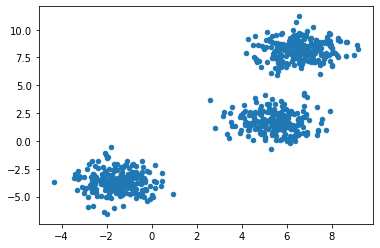

In [ ]:
###
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 700, n_features=2, centers=3, cluster_std=0.9, shuffle=True, random_state=231)
plt.scatter(X[:,0], X[:,1], s=20, marker='o')
km = KMeans(n_clusters = 2, init='random', n_init=5, max_iter=300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)

In [ ]:
X

array([[-1.97610415, -5.04975941],
       [-2.31385207, -3.60861331],
       [ 3.43896943,  0.21986699],
       ...,
       [-2.51762257, -3.6585397 ],
       [-3.32718103, -4.40985551],
       [-2.83982749, -5.06405393]])

# Description about 
n_clusters = 3, the number of centroids
n_init the number of times that run the algorithm
remember with different random centroids with the objective of
minimize SSE.
# max iter---the number of maximun iterations
in each only ejecution..




## A problem in K-means is one centroid could be let empty...
this is soluted with C-fuzzy means..

this is stopped if reach the convergence before of reach the number
of maximun iterations..


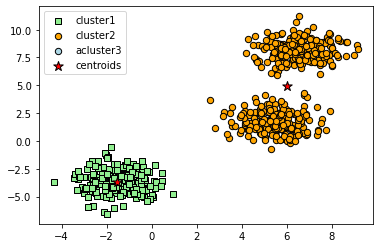

In [ ]:
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

In [ ]:
# K-means ++
#How initialize the centroids...
## initialize with init='k-means++'

In [ ]:
# Elbow method...
# We can uses SSE to measure 
# we can get SSE with km.inertia_

In [ ]:
km.inertia_

6216.010314587795

In [ ]:
## How we can choose k.
# if K increase the distortion reduced
# due centroids are nearest of points..
# the insight behind elbow method  is that choose the value of K where distortion increase more fast

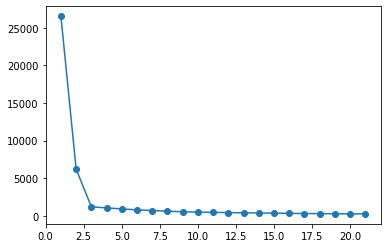

In [ ]:
distortions = []
for i in range(1,22):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,22), distortions, marker='o')

In [ ]:
## Calidad del agrupamiento....
# una representación gŕafica de como están agrupadas las muestras en los grupos...
# Cohesión del grupo a(i)  la distancia media entre una muestra y el restante de muestras en el mismo grupo
# separación del grupo b(i) a partir del grupo  mas cercano como la distancia entre una muestra 
# y todas las muestras del grupo mas cercano.


In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
y_km = km.fit_predict(X)

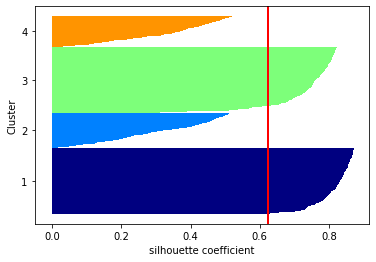

In [ ]:
import numpy as np
from matplotlib import cm 
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height=1.0, edgecolor='none', color = color)
  yticks.append((y_ax_lower + y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
  plt.axvline(silhouette_avg, color='red')
  plt.yticks(yticks, cluster_labels+1)
  plt.ylabel('Cluster')
  plt.xlabel('silhouette coefficient')

In [ ]:
# Hierarchical clustering 
# Advantage no is neccesary define k apriori ....

#Example using complete linkage...
##### remeber algorithm --->
# Calculate the distance matrix..
# combine the two groups more closest in more inequality distances
# update matrix
# repeat until there are one cluster

In [ ]:
import pandas as pd
import numpy as np
vars = ['income', 'consumption', 'visits']
labels = ['one', 'two', 'three', 'four', 'five']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=vars)

In [ ]:
df

,income,consumption,visits
0,1.806456,3.244806,2.970427
1,9.535188,0.921513,6.256883
2,6.588691,2.814823,6.754724
3,6.489058,7.731447,1.370483
4,2.739029,6.089803,7.939009


In [ ]:
from scipy.spatial.distance import pdist, squareform 
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)

In [ ]:
row_dist

,one,two,three,four,five
one,0.000000,8.713884,6.113555,6.679560,5.800906
two,8.713884,0.000000,3.537558,8.918016,8.702215
three,6.113555,3.537558,0.000000,7.291993,5.191138
four,6.679560,8.918016,7.291993,0.000000,7.739718
five,5.800906,8.702215,5.191138,7.739718,0.000000


In [ ]:
from  scipy.cluster.hierarchy import linkage

In [ ]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [ ]:
pd.DataFrame(row_clusters, columns=['label1', 'label2', 'distance', 'number of items']
             , index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])


,label1,label2,distance,number of items
cluster 1,1.0,2.0,3.537558,2.0
cluster 2,0.0,4.0,5.800906,2.0
cluster 3,3.0,6.0,7.739718,3.0
cluster 4,5.0,7.0,8.918016,5.0


Text(0, 0.5, 'l2 norma')

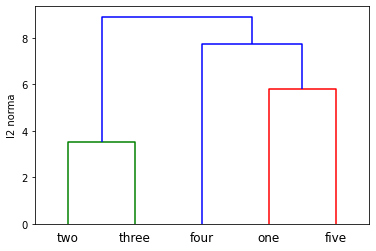

In [ ]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels =labels)
plt.ylabel('l2 norma')

*italicized text*

In [ ]:
## Iris fit
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2022-05-24 16:07:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-05-24 16:07:13 (82.9 MB/s) - ‘iris.data’ saved [4551/4551]



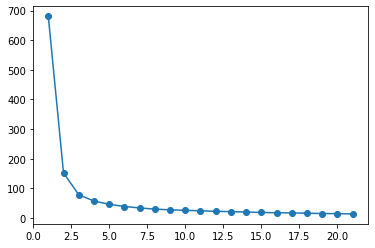

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = None
df = pd.read_csv("iris.data", header=None)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
estimator = KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter=300, tol = 1e-04, random_state=0)
predict_labels = estimator.fit_predict(X)
distortions = []
for i in range(1,22):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,22), distortions, marker='o')
#df['predicted'] = predict_labels

In [ ]:
X  = df.iloc[:,:-1]   # 0  sepalo largo- ancho
y = df.iloc[:,-1]                  # 1

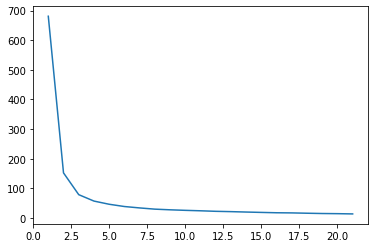

In [ ]:
range_max = 22
distorsions = []
for i in range(1,range_max):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distorsions.append(km.inertia_)
plt.plot(range(1, range_max),distorsions)
estimator = KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter=300, tol = 1e-04, random_state=0)
predict_labels = estimator.fit_predict(X)

In [ ]:
predict_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
df['4-hat'] = predict_labels

In [ ]:
df.columns =[str(x) for x in df.columns]
df['4-hat'] = df['4-hat'].astype('str')

[(0.23926448010096787, 0.1756909733415511), (-0.02052593881318176, -0.04756917050840219), (0.08455062124257373, 0.09465538545877471)]
[(0.24084585268418304, 0.16583949515697932), (-0.01880072034091521, -0.03289876849246613), (0.07881982056939028, 0.10648975702585445)]
[(0.24413052444691702, 0.155838990464199), (0.0004118274764269396, -0.025684380581995656), (0.07192291420910751, 0.13140393740098397)]
[(0.24306690122509655, 0.14748054372076908), (0.0037052945039383082, -0.021440064528841524), (0.06481577122590809, 0.14773982800646296)]
[(0.24145581483722242, 0.14276632390111393), (0.013679358692011213, -0.017532268447454286), (0.057438792051856945, 0.164673352983542)]
[(0.24117584747238188, 0.14116618242361542), (0.020335872571556612, -0.012616852871673875), (0.055603254229217684, 0.17615946230564777)]
[(0.23807087440575436, 0.14038595131360906), (0.021281497716336636, -0.007892753219252707), (0.04992464596456282, 0.18558792827213125)]
[(0.2360679791346361, 0.14024827500385548), (0.0212

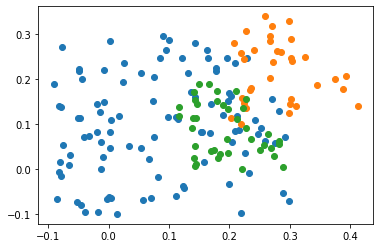

In [ ]:
## From scratch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
def centroid(x,y,k, size):
  low_x = x-k
  high_x = x+k
  low_y = y-k
  high_y = y+k
  x = uniform(low_x,high_x, size)
  y = uniform(low_y,high_y,size)
  r=x**2+y**2 < k
  x=x[r]
  y=y[r]
  return x,y
xa,ya = centroid(0.1,0.1,0.2,100)
xb,yb = centroid(0.4,0.3,0.2,100)
xc,yc = centroid(0.2,0.1,0.1,40)
plt.scatter(xa,ya)
plt.scatter(xb,yb)
plt.scatter(xc,yc)
dataX = np.concatenate((xa, xb, xc))
dataY = np.concatenate((ya, yb, yc))
data = [(dataX[i],dataY[i]) for i in range(len(dataX))]
## Cluster implementation:
def distance(x1,y1,x2,y2):
  return ((x2-x1)**2 + (y2-y1)**2)**1/2
# init centroids 
def centroids_init(k,data, random=False):
  init_points = []
  if random==False:
    for x in range(k):
      init_points.append((data[x][0],data[x][1]))
  elif random==True:
    interandom = np.random.randint(0,len(data), size=k)
    init_points = [data[k] for k in interandom]
  return init_points
def cluster(k,data, centroids):
  clusters = {k:[] for k in range(0,k)}
  for point in data:
    aux = []
    for k in centroids:
      aux.append(distance(k[0],k[1],point[0],point[1]))
    index  = aux.index(min(aux))
    clusters[index].append(point)
  return clusters
def update_centroids(clusters):
  k = []
  for cluster in clusters:
    x,y = [],[]
    for e in clusters[cluster]:
      x.append(e[0])
      y.append(e[1])
    k.append((sum(x)/len(x),sum(y)/len(y)))
  return k
k = 3 
centroids = centroids_init(k,data, random=True)
clusterK = cluster(k,data,centroids)
iter = 0
while centroids != update_centroids(clusterK):
  centroids = update_centroids(clusterK)
  clusterK = cluster(k,data,centroids)
  iter +=1
  print(centroids)
print(iter)

In [ ]:
data

## DBSCAN


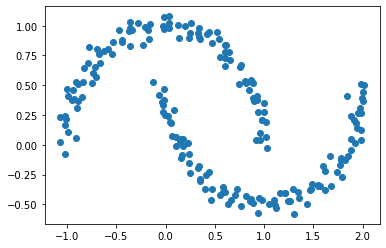

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
X,y = make_moons(n_samples =200,noise = 0.05, random_state = 0)
plt.scatter(X[:,0],X[:,1])

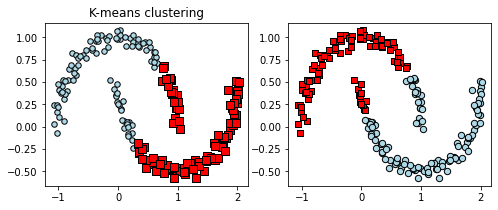

In [ ]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
yhat = km.fit_predict(X)
ax1.scatter(X[yhat==0,0], X[yhat==0,1], c='lightblue', edgecolor='black', marker='o', s=30, label='cluster1')
ax1.scatter(X[yhat==1,0], X[yhat==1,1], c='red', edgecolor='black', marker='s', s=50, label='cluster2')
ax1.set_title("K-means clustering")
Hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
yhatA = Hierarchical.fit_predict(X)
ax2.scatter(X[yhatA==0,0], X[yhatA==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster1')
ax2.scatter(X[yhatA==1,0], X[yhatA==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster2')


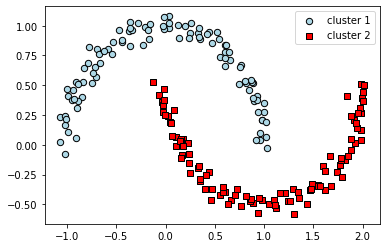

In [ ]:
# DBSCAN algorithm
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c='red', edgecolor='black', marker='s', s=40,  label='cluster 2')
plt.legend()